In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import numba as nb
import numpy as np
import pickle

In [65]:
@nb.njit(fastmath=True)
def dist(pos1, pos2):
    x = np.array(pos1) - np.array(pos2)
    return np.sqrt(x.dot(x))

In [45]:
HWALLS = np.array([[10, 100, 100],
                    [10, 100, 0.00],
                     [0, 10, 46.5],
                     [0, 10, 53.5]])

#ymin, ymax, x
VWALLS = np.array([[0, 100, 100],
                     [0, 47, 10],
                     [53, 100, 10]])

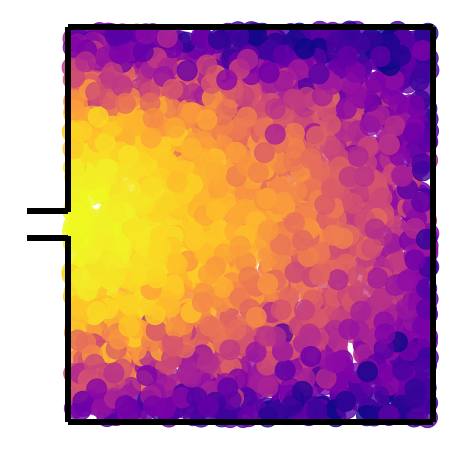

In [73]:
# plotten van agents op start positie
iterations = range(0, 20)
plt.figure(figsize=(8,8))

for a, b, c in HWALLS:
    plt.hlines(c, a, b,linewidth=6, color='black')

for a, b, c in VWALLS:
    plt.vlines(c, a, b,linewidth=6, color='black')
    
plt.axis("off")

for iteration in iterations:
    df = pd.read_csv(f'../data/log/density/10runs0-0.2/density=0.10.i={iteration}.csv')

    gates_excluded = [x for x in df.columns if "gate" not in x]

    orig_dist = df[gates_excluded].filter(regex='distance')
    orig_dist = list(orig_dist.iloc[1])

    agent_locations = [x for x in gates_excluded if "orig_distance" not in x]
    df = df[agent_locations]

    nans = []
    for column in range(1,len(df.columns),2):
        first_nan = df[df.columns[column]].isna().idxmax(1)
        nans.append(first_nan)

    while nans.count(0) > 0:
        nans[nans.index(0)] = df.timestep.iat[-1]

    normalized_nans = np.array(nans) / max(nans)

    x_list = []
    y_list = []
    c_list = []

    count = 0
    for i in range(1, len(df.iloc[0]), 2):
        x = df.iloc[0][i]
        y = df.iloc[0][i+1]

        x_list.append(x)
        y_list.append(y)
        c_list.append(normalized_nans[count])
        count+=1

    plt.scatter(x_list, y_list, cmap='plasma_r', c=c_list, s = 400, alpha = 0.8, marker='o')
    plt.savefig(f"figures/heatmap/jpg/heatmap_{iteration}.jpg")
    

plt.savefig("figures/heatmap.svg", format='svg')
plt.show()
